In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import graphviz 
import pydotplus
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import NuSVR, LinearSVR
from sklearn.svm import SVC 
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file = "DC_Properties.csv"

# Read our Kickstarter data into pandas
df = pd.read_csv(file)
df.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
5,5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,...,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
6,6,1,0,Warm Cool,Y,2.0,5,2,1917.0,1988.0,...,-77.041055,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
7,7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,...,-77.040129,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
8,8,3,1,Warm Cool,Y,2.0,7,3,1908.0,2008.0,...,-77.039903,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
9,9,1,1,Hot Water Rad,Y,1.0,6,2,1908.0,1979.0,...,-77.040081,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [3]:
df.columns


Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [4]:
#Heat, AC(Binary), SALEDATE(parse Date Format), Qualified, Style, Struct, Grade, CNDTN, EXTWALL, ROOF, INTWALL, GIS_LAST_MOD_DTTM,/
#Source, NATIONALGRID, ASSESSMENT_NBHD, ASSESSMENT_SUBNBHD, 
df.dtypes

Unnamed: 0              int64
BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS             float64
ROOMS                   int64
BEDRM                   int64
AYB                   float64
YR_RMDL               float64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                 float64
QUALIFIED              object
SALE_NUM                int64
GBA                   float64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS              float64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
CMPLX_NUM             float64
LIVING_GBA            float64
FULLADDRES

In [5]:
# df = pd.get_dummies(df[''])

In [6]:
# dropped_null_df = df.dropna(thresh=1)

In [7]:
# dropped_null_df.head()

In [8]:
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [9]:
df['ASSESSMENT_NBHD']

0                   Old City 2
1                   Old City 2
2                   Old City 2
3                   Old City 2
4                   Old City 2
5                   Old City 2
6                   Old City 2
7                   Old City 2
8                   Old City 2
9                   Old City 2
10                  Old City 2
11                  Old City 2
12                  Old City 2
13                  Old City 2
14                  Old City 2
15                  Old City 2
16                  Old City 2
17                  Old City 2
18                  Old City 2
19                  Old City 2
20                  Old City 2
21                  Old City 2
22                  Old City 2
23                  Old City 2
24                  Old City 2
25                  Old City 2
26                  Old City 2
27                  Old City 2
28                  Old City 2
29                  Old City 2
                  ...         
158927              Old City 2
158928  

In [10]:
df['LIVING_GBA']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
           ...  
158927    1342.0
158928    1100.0
158929    1130.0
158930     990.0
158931     920.0
158932     942.0
158933     795.0
158934     671.0
158935     551.0
158936     644.0
158937     825.0
158938    1413.0
158939     825.0
158940    1413.0
158941     861.0
158942    1492.0
158943    1838.0
158944    1938.0
158945     659.0
158946     818.0
158947     809.0
158948     934.0
158949    1123.0
158950    1330.0
158951    1413.0
158952     639.0
158953     820.0
158954    1167

In [11]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

NUM_UNITS              52261
AYB                      271
YR_RMDL                78029
STORIES                52305
SALEDATE               26770
PRICE                  60741
GBA                    52261
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY                   52906
STATE                  52906
ZIPCODE                    1
NATIONALGRID           52906
LATITUDE                   1
LONGITUDE                  1
ASSESSMENT_NBHD            1
ASSESSMENT_SUBNBHD     32551
CENSUS_TRACT               1
CENSUS_BLOCK           52906
WARD                       1
X                        237
Y                        237
QUADRANT                 237
dtype: int64

In [12]:
df['STORIES']

0         3.0
1         3.0
2         3.0
3         3.0
4         3.0
5         4.0
6         2.0
7         3.0
8         2.0
9         2.0
10        3.0
11        3.0
12        3.0
13        3.0
14        2.0
15        2.0
16        2.0
17        2.0
18        2.0
19        2.0
20        3.0
21        3.0
22        2.0
23        2.0
24        2.0
25        2.0
26        3.0
27        3.0
28        4.0
29        3.0
         ... 
158927    NaN
158928    NaN
158929    NaN
158930    NaN
158931    NaN
158932    NaN
158933    NaN
158934    NaN
158935    NaN
158936    NaN
158937    NaN
158938    NaN
158939    NaN
158940    NaN
158941    NaN
158942    NaN
158943    NaN
158944    NaN
158945    NaN
158946    NaN
158947    NaN
158948    NaN
158949    NaN
158950    NaN
158951    NaN
158952    NaN
158953    NaN
158954    NaN
158955    NaN
158956    NaN
Name: STORIES, Length: 158957, dtype: float64

In [13]:
df['ASSESSMENT_SUBNBHD']

0         040 D Old City 2
1         040 D Old City 2
2         040 D Old City 2
3         040 D Old City 2
4         040 D Old City 2
5         040 D Old City 2
6         040 D Old City 2
7         040 D Old City 2
8         040 D Old City 2
9         040 D Old City 2
10        040 D Old City 2
11        040 D Old City 2
12        040 D Old City 2
13        040 D Old City 2
14        040 D Old City 2
15        040 D Old City 2
16        040 D Old City 2
17        040 D Old City 2
18        040 D Old City 2
19        040 D Old City 2
20        040 E Old City 2
21        040 E Old City 2
22        040 E Old City 2
23        040 E Old City 2
24        040 E Old City 2
25        040 E Old City 2
26        040 E Old City 2
27        040 E Old City 2
28        040 E Old City 2
29        040 E Old City 2
                ...       
158927    040 G Old City 2
158928    040 G Old City 2
158929    040 G Old City 2
158930    040 B Old City 2
158931    040 B Old City 2
158932    040 B Old City 2
1

In [14]:
df.notna()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [15]:
df.isna()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,...,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,...,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,...,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,...,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,...,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,...,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,...,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,...,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [17]:
# Max Stories is 825
df2 = df[df['STORIES'] > 825 ]
df2.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
7546,7546,1,2,Hot Water Rad,N,1.0,6,3,1920.0,2001.0,...,-76.996409,Old City 1,039 K Old City 1,8302.0,008302 1009,Ward 6,861,-76.997269,38.896641,NE


In [18]:
#'YR_RMDL minimun is 20'
df2 = df[df['YR_RMDL'] < 21]
df2.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
56600,56600,1,1,Forced Air,Y,1.0,8,4,1929.0,20.0,...,-77.021993,Brightwood,006 E Brightwood,1901.0,001901 1000,Ward 4,3202,-77.021133,38.962204,NW


In [19]:
#First building in dataset built in 1954
df2 = df[df['AYB'] < 1755 ]  

In [20]:
df2.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
23999,23999,4,2,Warm Cool,Y,1.0,9,5,1754.0,2012.0,...,-77.098661,Palisades,041 B Palisades,801.0,000801 4011,Ward 3,1387,-77.096813,38.915653,NW
37034,37034,7,2,Warm Cool,Y,1.0,14,8,1754.0,1983.0,...,-77.053515,Kalorama,029 A Kalorama,4100.0,004100 2004,Ward 2,2502,-77.054567,38.917860,NW


In [21]:
df2 = df[df['PRICE'] < 5 ]
df2.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
81694,81694,1,1,Hot Water Rad,N,1.0,7,3,1929.0,1970.0,...,-76.974987,Michigan Park,NaN,9400.0,009400 4010,Ward 5,4229,-76.975204,38.938986,NE
106683,106683,3,0,Forced Air,N,3.0,14,6,1953.0,1999.0,...,-77.006997,Congress Heights,016 A Congress Heights,10900.0,010900 2000,Ward 8,6254,-77.006347,38.821799,SW
132821,132821,2,0,Forced Air,Y,NaN,4,2,1956.0,NaN,...,-77.069088,Wakefield,NaN,1200.0,NaN,Ward 3,1978,-77.069091,38.951258,NW
148694,148694,1,0,Forced Air,Y,NaN,3,1,2007.0,NaN,...,-77.015750,Old City 2,040 B Old City 2,4702.0,NaN,Ward 6,528,-77.015752,38.900447,NW
152131,152131,2,0,Hot Water Rad,N,NaN,6,3,1920.0,2000.0,...,-77.060075,Forest Hills,NaN,1302.0,NaN,Ward 3,2234,-77.060077,38.940234,NW


In [22]:
df['SOURCE']

0         Residential
1         Residential
2         Residential
3         Residential
4         Residential
5         Residential
6         Residential
7         Residential
8         Residential
9         Residential
10        Residential
11        Residential
12        Residential
13        Residential
14        Residential
15        Residential
16        Residential
17        Residential
18        Residential
19        Residential
20        Residential
21        Residential
22        Residential
23        Residential
24        Residential
25        Residential
26        Residential
27        Residential
28        Residential
29        Residential
             ...     
158927    Condominium
158928    Condominium
158929    Condominium
158930    Condominium
158931    Condominium
158932    Condominium
158933    Condominium
158934    Condominium
158935    Condominium
158936    Condominium
158937    Condominium
158938    Condominium
158939    Condominium
158940    Condominium
158941    

In [23]:
df['INTWALL'].unique()

array(['Hardwood', 'Wood Floor', 'Hardwood/Carp', 'Carpet', 'Lt Concrete',
       'Vinyl Comp', 'Ceramic Tile', 'Default', 'Terrazo', 'Parquet',
       'Vinyl Sheet', 'Resiliant', nan], dtype=object)

In [24]:
df['GRADE'].unique()

array(['Very Good', 'Above Average', 'Good Quality', 'Excellent',
       'Average', 'Superior', 'Fair Quality', 'Exceptional-D',
       'Exceptional-C', 'Low Quality', 'Exceptional-A', 'Exceptional-B',
       'No Data', nan], dtype=object)

In [25]:
df['CNDTN'].unique()

array(['Good', 'Very Good', 'Average', 'Fair', 'Excellent', 'Poor',
       'Default', nan], dtype=object)

In [26]:
df['STYLE'].unique

<bound method Series.unique of 0         3 Story
1         3 Story
2         3 Story
3         3 Story
4         3 Story
5         4 Story
6         2 Story
7         3 Story
8         2 Story
9         2 Story
10        3 Story
11        3 Story
12        3 Story
13        3 Story
14        2 Story
15        2 Story
16        2 Story
17        2 Story
18        2 Story
19        2 Story
20        3 Story
21        3 Story
22        2 Story
23        2 Story
24        2 Story
25        2 Story
26        3 Story
27        3 Story
28        4 Story
29        3 Story
           ...   
158927        NaN
158928        NaN
158929        NaN
158930        NaN
158931        NaN
158932        NaN
158933        NaN
158934        NaN
158935        NaN
158936        NaN
158937        NaN
158938        NaN
158939        NaN
158940        NaN
158941        NaN
158942        NaN
158943        NaN
158944        NaN
158945        NaN
158946        NaN
158947        NaN
158948        NaN
158949        N

In [27]:
# 'CNDTN':{'Good':4, 'Very Good':5, 'Average':3, 'Fair':2, 'Excellent':7, 'Poor':1,
#        'Default':0}

In [28]:
# 'GRADE':{'Very Good':4, 'Above Average':6, 'Good Quality':3, 'Excellent':8,
#        'Average':5, 'Superior':7, 'Fair Quality':2, 'Exceptional-D':12,
#        'Exceptional-C':11, 'Low Quality':1, 'Exceptional-A':9, 'Exceptional-B':10,
#        'No Data':0

In [29]:
# 'INTWALL':{'Hardwood':1, 'Wood Floor':2, 'Hardwood/Carp':3, 'Carpet':4, 'Lt Concrete':5,
#        'Vinyl Comp':6, 'Ceramic Tile':7, 'Default':8, 'Terrazo':9, 'Parquet':10,
#        'Vinyl Sheet':11, 'Resiliant':12}

In [30]:
# encoding={'HEAT':{'Air Exchng':1, 'Air-Oil':2, 'Elec Base Brd':1, 'Electric Rad':2, 'Evp Cool':1,
#        'Forced Air':2, 'Gravity Furnac':1, 'Hot Water Rad':1, 'Ht Pump':3, 'Ind Unit':1,
#        'No Data':0, 'Wall Furnace':1, 'Warm Cool':2, 'Water Base Brd':1}}
# df.replace(encoding, inplace=True)

In [31]:
# df

In [32]:
# data_ml_5_years_dummy = pd.to_dummies(data_ml_5_years_dummy, columns=['AC','INTWALL', 'HEAT']

In [33]:
!pwd

/c/Users/salaz/Desktop/New folder/RICH201901DATA3


In [34]:
new_file = "Clean DC data.csv"

# Read our Kickstarter data into pandas
df_clean = pd.read_csv(new_file)
df_clean.head(20)

,Unnamed: 0,BATHRM,HF_BATHRM,ROOMS,BEDRM,EYB,STORIES,SALEDATE,PRICE,GBA,...,ZIPCODE_20019.0,ZIPCODE_20020.0,ZIPCODE_20024.0,ZIPCODE_20032.0,ZIPCODE_20036.0,ZIPCODE_20037.0,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
0,2,3,1,9,5,1984,3.0,2016-06-21 00:00:00,2100000.0,2522.0,...,0,0,0,0,0,0,0,1,0,0
1,8,3,1,7,3,1967,2.0,2018-05-03 00:00:00,1430000.0,1488.0,...,0,0,0,0,0,0,0,1,0,0
2,20,3,1,14,5,1987,3.0,2016-01-12 00:00:00,33232.0,3465.0,...,0,0,0,0,0,0,0,1,0,0
3,29,3,1,11,3,1984,3.0,2013-12-11 00:00:00,1210000.0,2520.0,...,0,0,0,0,0,0,0,1,0,0
4,41,3,1,9,4,1967,3.0,2016-09-14 00:00:00,1550000.0,2552.0,...,0,0,0,0,0,0,0,1,0,0
5,42,3,1,9,4,1967,3.0,2015-09-16 00:00:00,1599900.0,2520.0,...,0,0,0,0,0,0,0,1,0,0
6,43,3,1,13,4,1967,3.0,2018-03-30 00:00:00,1700000.0,2382.0,...,0,0,0,0,0,0,0,1,0,0
7,44,3,2,10,4,1967,3.0,2017-05-01 00:00:00,1700000.0,2520.0,...,0,0,0,0,0,0,0,1,0,0
8,62,4,2,11,5,1978,4.0,2014-03-05 00:00:00,1599000.0,3162.0,...,0,0,0,0,0,0,0,1,0,0
9,72,4,2,8,3,1964,2.0,2014-10-08 00:00:00,993500.0,1148.0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
df_clean['SALEDATE']=pd.to_datetime(df['SALEDATE']).dt.year
df_clean = df_clean.dropna()



In [36]:
df_clean

,Unnamed: 0,BATHRM,HF_BATHRM,ROOMS,BEDRM,EYB,STORIES,SALEDATE,PRICE,GBA,...,ZIPCODE_20019.0,ZIPCODE_20020.0,ZIPCODE_20024.0,ZIPCODE_20032.0,ZIPCODE_20036.0,ZIPCODE_20037.0,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
0,2,3,1,9,5,1984,3.0,2003.0,2100000.0,2522.0,...,0,0,0,0,0,0,0,1,0,0
1,8,3,1,7,3,1967,2.0,2000.0,1430000.0,1488.0,...,0,0,0,0,0,0,0,1,0,0
2,20,3,1,14,5,1987,3.0,2016.0,33232.0,3465.0,...,0,0,0,0,0,0,0,1,0,0
3,29,3,1,11,3,1984,3.0,2006.0,1210000.0,2520.0,...,0,0,0,0,0,0,0,1,0,0
5,42,3,1,9,4,1967,3.0,2010.0,1599900.0,2520.0,...,0,0,0,0,0,0,0,1,0,0
6,43,3,1,13,4,1967,3.0,2011.0,1700000.0,2382.0,...,0,0,0,0,0,0,0,1,0,0
7,44,3,2,10,4,1967,3.0,2011.0,1700000.0,2520.0,...,0,0,0,0,0,0,0,1,0,0
8,62,4,2,11,5,1978,4.0,2018.0,1599000.0,3162.0,...,0,0,0,0,0,0,0,1,0,0
9,72,4,2,8,3,1964,2.0,2008.0,993500.0,1148.0,...,0,0,0,0,0,0,0,1,0,0
11,81,2,1,11,3,1990,2.0,2009.0,1363000.0,1380.0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
df_clean

,Unnamed: 0,BATHRM,HF_BATHRM,ROOMS,BEDRM,EYB,STORIES,SALEDATE,PRICE,GBA,...,ZIPCODE_20019.0,ZIPCODE_20020.0,ZIPCODE_20024.0,ZIPCODE_20032.0,ZIPCODE_20036.0,ZIPCODE_20037.0,QUADRANT_NE,QUADRANT_NW,QUADRANT_SE,QUADRANT_SW
0,2,3,1,9,5,1984,3.0,2003.0,2100000.0,2522.0,...,0,0,0,0,0,0,0,1,0,0
1,8,3,1,7,3,1967,2.0,2000.0,1430000.0,1488.0,...,0,0,0,0,0,0,0,1,0,0
2,20,3,1,14,5,1987,3.0,2016.0,33232.0,3465.0,...,0,0,0,0,0,0,0,1,0,0
3,29,3,1,11,3,1984,3.0,2006.0,1210000.0,2520.0,...,0,0,0,0,0,0,0,1,0,0
5,42,3,1,9,4,1967,3.0,2010.0,1599900.0,2520.0,...,0,0,0,0,0,0,0,1,0,0
6,43,3,1,13,4,1967,3.0,2011.0,1700000.0,2382.0,...,0,0,0,0,0,0,0,1,0,0
7,44,3,2,10,4,1967,3.0,2011.0,1700000.0,2520.0,...,0,0,0,0,0,0,0,1,0,0
8,62,4,2,11,5,1978,4.0,2018.0,1599000.0,3162.0,...,0,0,0,0,0,0,0,1,0,0
9,72,4,2,8,3,1964,2.0,2008.0,993500.0,1148.0,...,0,0,0,0,0,0,0,1,0,0
11,81,2,1,11,3,1990,2.0,2009.0,1363000.0,1380.0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18300 entries, 0 to 21805
Columns: 119 entries, Unnamed: 0 to QUADRANT_SW
dtypes: float64(5), int64(114)
memory usage: 16.8 MB


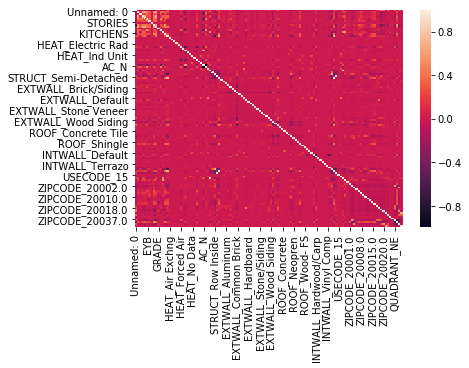

In [39]:
sns.heatmap(df_clean.corr(method='spearman'))

In [40]:
# X = df_clean.drop('PRICE', axis=1).values
# y = df_clean["PRICE"].values.reshape(-1, 1)
# # X = voice.drop("label", axis=1)


In [41]:
# print(X.shape, y.shape)

In [42]:
df_clean['LOGPRICE']=np.log(df_clean['PRICE'])

In [46]:
X=df_clean.drop(['PRICE','LOGPRICE'], axis=1)
y=df_clean['LOGPRICE']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state = 42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [48]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# lm.fit(X_train,Y_train)

In [49]:
print(lm.intercept_)
print(lm.coef_)

12.365932391779916
[-4.28100537e-06  6.59849945e-02  3.88295926e-02 -2.95636942e-04
  1.81141688e-02  9.58532127e-04  2.34607165e-04 -5.86089233e-04
  1.63608833e-04  3.20663766e-03  1.35809542e-01  4.09204198e-03
  5.26613041e-02  1.13962486e-05 -5.09902072e-01 -2.16254869e-02
 -1.27991909e-01  1.12835880e-01 -8.78060088e-02  2.16572236e-02
  1.05471894e-01  4.76552361e-02  6.10566534e-03  2.30023659e-01
  9.78065081e-02  1.69405432e-02  2.21309363e-02  8.66979301e-02
  1.47844781e-01 -1.03248648e-01 -4.45961330e-02  1.25774396e+00
 -2.91867841e-01 -1.89131646e-01 -1.92643148e-01 -2.05252865e-01
 -1.14304862e-01 -6.71252858e-02 -1.97418316e-01 -1.55899103e-02
 -1.75073503e-01 -6.64723961e-02 -1.00921925e-02 -4.32044512e-02
 -5.48845088e-02  1.05720104e-02 -1.38855154e-01  6.15353470e-01
 -1.57021560e-01 -5.46352367e-02  6.61767516e-01 -3.31763495e-02
 -4.86500963e-02 -6.17772100e-02 -5.85796891e-02 -1.23416117e-01
 -4.49275814e-02 -7.00975123e-02 -8.60000793e-02 -4.52394483e-02
  4.40

In [55]:
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
INTWALL_Vinyl Comp,1.615720
STRUCT_Default,1.257744
USECODE_19,0.756471
EXTWALL_Metal Siding,0.661768
EXTWALL_Default,0.615353
USECODE_39,0.588962
ZIPCODE_20007.0,0.289732
ZIPCODE_20008.0,0.288631
ZIPCODE_20036.0,0.277751
ZIPCODE_20005.0,0.250140


In [ ]:
#     for n in range(2, 30, 2):
#         pca = PCA(n_components=n)

#        # note, y is optional here
#         pca.fit(X_train_scaled)
#         X_train_pca=pca.transform(X_train_scaled)
#         X_test_pca=pca.transform(X_test_scaled)

#         print()
#         print("n: "+str(n))

#         print("R^2: "+ str(model.score(X_test_pca, y_test)))

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state = 42)

In [ ]:
# pca = PCA()

In [ ]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# X_train_pca=pca.fit_transform(X_train_scaled)
# X_test_pca=pca.transform(X_test_scaled)

In [ ]:
#This Version renders
# # X_train_pca=pca.transform(X_train_scaled)
# # X_test_pca=pca.transform(X_test_scaled)
# def modelMaker(df, target, models, scale = True, dummy = True, rs = 42):
#     global X_train_pca, X_test_pca, y_train, y_test
#     try:
#         assert len(models) > 0

#     except:
#         models = [models]
        
#     for model in models:
#         print("Fitting "+str(model).split("(")[0])
# #         model.fit(X_train_pca, y_train)
#         print("R^2: "+ str((X_test, y_test)))
#         for n in range(2, 40, 2):
#             pca = PCA(n_components=n)

#             # note, y is optional here
#             pca.fit(X_train_scaled)        
#             X_train_pca=pca.transform(X_train_scaled)   
#             X_test_pca =pca.transform(X_test_scaled)   
#             model.fit(X_train_pca, y_train)

#             print()
#             print("n: "+str(n))

#             print("R^2: "+ str(model.score(X_test_pca, y_test)))
# modelMaker(df, "PRICE", [LinearRegression(), Lasso(), Ridge(), ElasticNet(), NuSVR(), LinearSVR()])

In [ ]:
# #PCA by itself after find best components
# pca = PCA(n_components=26)

# # note, y is optional here
# pca.fit(X_train_scaled)        
# X_train_pca=pca.transform(X_train_scaled)   
# X_test_pca =pca.transform(X_test_scaled)   
# pca.fit(X_train_pca, y_train)

In [ ]:
print(X_train.shape, X_train_scaled.shape, X_test.shape, X_test_scaled.shape, y_train.shape, y_test.shape)

In [ ]:
#     for n in range(2, 30, 2):
#         pca = PCA(n_components=n)

#        # note, y is optional here
#         pca.fit(X_train_scaled)
#         X_train_pca=pca.transform(X_train_scaled)
#         X_test_pca=pca.transform(X_test_scaled)

#         print()
#         print("n: "+str(n))

#         print("R^2: "+ str(model.score(X_test_pca, y_test)))

In [ ]:
# modelMaker(df, "PRICE", [LinearRegression(), Lasso(), Ridge(), ElasticNet(), NuSVR(), LinearSVR()])

In [ ]:
# for n in range(2, 30, 2):
#     pca = PCA(n_components=n)

#    # note, y is optional here
#     pca.fit(X_train_scaled)
#     X_train_pca=pca.transform(X_train_scaled)
#     X_test_pca=pca.transform(X_test_scaled)

#     print()
#     print("n: "+str(n))

#     print("R^2: "+ str(model.score(X_test_pca, y_test)))
#     modelMaker(df, "PRICE", [
#    LinearRegression(), Lasso(), Ridge(), ElasticNet(), #Linear Models
#    NuSVR(), LinearSVR() #SVMs
# ])

In [ ]:
# X_train_pca=pca.transform(X_train_scaled)
# X_test_pca=pca.transform(X_test_scaled)

In [ ]:
# def modelMaker(df, target, models, scale = True, dummy = True, rs = 42):
#     global X_train_pca, X_test_pca, y_train, y_test
#     try:
#         assert len(models) > 0
        

#         except:
#             models = [models]
        
# #             for n in range(2, 30, 2):
# #                 pca = PCA(n_components=n)

# #            # note, y is optional here
# #                 pca.fit(X_train_scaled)
# #                 X_train_pca=pca.transform(X_train_scaled)
# #                 X_test_pca=pca.transform(X_test_scaled)

# #                 print()
# #                 print("n: "+str(n))


#         for model in models:
#             for n in range(2, 30, 2):
#                 pca = PCA(n_components=n)

#            # note, y is optional here
#                 pca.fit(X_train_scaled)
#                 X_train_pca=pca.transform(X_train_scaled)
#                 X_test_pca=pca.transform(X_test_scaled)

#                 print()
#                 print("n: "+str(n))
#                 print("Fitting "+str(model).split("(")[0])
#                 model.fit(X_train_pca, y_train)
#                 print("R^2: "+ str(model.score(X_test_pca, y_test)))

# modelMaker(df, "PRICE", [LinearRegression(), Lasso(), Ridge(), ElasticNet(), NuSVR(), LinearSVR()])

In [ ]:
# modelMaker(df, "PRICE", [LinearRegression(), Lasso(), Ridge(), ElasticNet(), NuSVR(), LinearSVR()]):

# Ridge Model 

In [ ]:
# ridgeReg = Ridge(alpha=500, normalize=True)
# ridgeReg.fit(X_train,y_train)

In [ ]:
# # coeff_df = pd.DataFrame(ridgeReg.coef_,X_test.columns,columns=['Coefficient'])
# # coeff_df.Coefficient.sort_values().plot.bar()
# ridgeReg.coef_(n_samples=20)
# # coeff_df = pd.DataFrame(ridgeReg.coef_,X_test.columns,columns=['Coefficient'])
# # coeff_df

In [ ]:
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [ ]:
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

In [ ]:
# model = SVR()

In [ ]:
# for n in range(2, 116, 5):
#     pca = PCA(n_components=n)

#     # note, y is optional here
#     pca.fit(X_train_scaled)

#     x = pca.transform(X_train_scaled)
#     model.fit(x, y_train_scaled)

#     x = pca.transform(X_test)
#     print()
#     print("n: "+str(n))
#     print(model.score(x, y_test))

In [ ]:
# def modelMaker(df, target, models, scale = True, dummy = True, rs = 42):
#     global X_train_pca, X_test_pca, y_train, y_test
#     # make dummy columns
# #     if dummy:
# #         df = pd.get_dummies(df)
#     # apply standard scaler
# #     if scale:
# #         df = pd.DataFrame(StandardScaler().fit_transform(df), columns = df.columns)
# #     # generate training and testing sets
# #     X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target], random_state = rs)
#     # make "models" a single-element list if it's not a list
#     try:
#         assert len(models) > 0
#     except:
#         models = [models]
        
#         for n in range(2, 116, 10):
#             pca = PCA(n_components=n)

#                 # note, y is optional here
#             pca.fit(X_train_scaled)

#             x = pca.transform(X_train_scaled)
#             model.fit(x, y_train_scaled)

#             x = pca.transform(X_test)
#             print()
#             print("n: "+str(n))
#             print(model.score(x, y_test))

#             for model in models:
#                 print("Fitting "+str(model).split("(")[0])
#                 model.fit(X_traiscaled, y_train_scaled)
#                 print("R^2: "+ str(model.score(X_test, y_test)))
#                 print(n)
# modelMaker(df, "PRICE", [LinearRegression(), Lasso(), Ridge(), ElasticNet(),NuSVR(), LinearSVR()])

In [ ]:
# #Linear model

# lm = LinearRegression()
# lm.fit(X_train,y_train)

In [ ]:
# modelMaker(df, "PRICE", [
#     LinearRegression(), Lasso(), Ridge(), ElasticNet(), #Linear Models
#     NuSVR(), LinearSVR()])

In [ ]:
# print(lm.intercept_)
# print(lm.coef_)

In [ ]:
#Logistic model won't work.
# import warnings
# warnings.filterwarnings("ignore")

# classifier = LogisticRegression()
# classifier

# classifier.fit(X_train, y_train)

In [ ]:
# print(f"Training Data Score: {classifier.score(X_train, y_train)}")

In [ ]:
# print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [ ]:
# df2 = df.drop('SALEDATE', axis=1)
# df2

In [ ]:
# X = df2.columns
# y = df2['PRICE'].values.reshape(-1, 1)

In [ ]:
# X = smoking[['Id', 'Age', 'Height', 'Sex_Female', 'Sex_Male', 'Smoker_Current', 'Smoker_Non']]
# y = smoking["FEV"].values.reshape(-1, 1)
# print(X.shape, y.shape)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df2.drop('PRICE', axis=1), df2['PRICE'], random_state = 42)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
# print((df2.drop('PRICE', axis=1).shape, df2['PRICE'].shape))

In [ ]:
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [ ]:
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

In [ ]:
# lm = LinearRegression()
# lm.fit(X_train,Y_train)

In [ ]:
# print(lm.intercept_)
# print(lm.coef_)

# Decision Tree rendrs .66 accuracy atm

In [62]:
# clf = tree.DecisionTreeClassifier(min_samples_split=10, random_state=10)
# clf = clf.fit(X, y)
# clf.score(X_test, y_test)

In [ ]:
# regressor = DecisionTreeRegressor(random_state=0)
# regressor.fit(X_train, y_train)


In [ ]:
#     print("Training score:{0}".format(regressor.score(X_train,y_train)))
#     print("Testing score:{0}".format(regressor.score(X_test,y_test)))
#     ##graph

In [ ]:
# Y_Pred=regressor.predict(X_train)

In [ ]:
# mse = mean_squared_error(y_train, Y_Pred)
# r_squared = r2_score(y_train, Y_Pred)
# print('Mean_Squared_Error :' ,mse)
# print('r_square_value :',r_squared)

In [ ]:
# Version 1 this renders
# dot_data = tree.export_graphviz(
#     clf, out_file=None, 
#     feature_names=df_clean.drop('PRICE', axis=1).columns,  
#     class_names=True,  
#     filled=True, rounded=True, 
#     label='root', 
#     max_depth=5,
#     proportion=True,
#     special_characters=False)  

# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('DC4.png')

# graph = graphviz.Source(dot_data)  
# graph 

In [ ]:
# This possible version renders
# dot_data = tree.export_graphviz(
#     clf, out_file=True, 
# #     feature_names=df.feature_names,  
#     class_names=df_clean['PRICE'],  
#     filled=True, rounded=True,  
#     special_characters=False)  

# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('DC.png')

# graph = graphviz.Source(dot_data)  
# graph 

# Random Forest Classsifier

In [ ]:
#Random forest Classifier model// too many dummy variables
# rf = RandomForestClassifier(max_depth=20, n_estimators=300)
# rf = rf.fit(X_train, y_train)
# rf.score(X_test, y_test)


In [ ]:
# sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [ ]:
# regressor = RandomForestRegressor(n_estimators=20, random_state=42)  
# regressor.fit(X_train_scaled, y_train)  
# y_pred = regressor.predict(X_test)  
# # rf = RandomForestClassifier(n_estimators=2)

# # rf = rf.fit(X_train_scaled, y_train)

# KNN

In [ ]:
# #K Nearest neighbors; renders but low train scores
# train_scores = []
# test_scores = []
# for k in range(2, 40, 2):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     train_score = knn.score(X_train, y_train)
#     test_score = knn.score(X_test, y_test)
#     train_scores.append(train_score)
#     test_scores.append(test_score)
#     print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
# plt.plot(range(1, 40, 2), train_scores, marker='o')
# plt.plot(range(1, 40, 2), test_scores, marker="x")
# plt.xlabel("k neighbors")
# plt.ylabel("Testing accuracy Score")
# plt.show()

# SVR / Gridsearch

In [68]:
#SVR model/ GridSearch/Hyper parameter optimzation
model = SVR()
model = SVC(kernel='linear')
model

param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005],
             'kernel': [ 'poly', 'sigmoid', 'precomputed' ]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [69]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=1, gamma=0.0001, kernel=poly ..................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [ ]:
# grid.fit(X_train_scaled, y_train)

In [ ]:
# grid.fit(X_train_pca, y_train)

In [ ]:
# print(grid.best_params_)

In [ ]:
# print(grid.best_score_)

In [ ]:
# predictions = grid.predict(X_test)

In [ ]:
# print(classification_report(y_test, predictions,
#                             target_names=["blue", "red"]))

# Testing something

In [ ]:
X = df_clean["BATHRM"].values.reshape(-1, 1)
y = df_clean["PRICE"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

In [ ]:
plt.scatter(X, y)
plt.xlabel("Bathrooms")
plt.ylabel("Price")

In [ ]:
# #PCA model
# import warnings
# warnings.filterwarnings("ignore")

# pca = PCA(n_components='mle')

# pca.fit(X_train)

# x = pca.transform(X_train)
# model.fit(x, y_train)

# x = pca.transform(X_test)

In [ ]:
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train_scaled, y_train)

In [ ]:
# regressor = RandomForestRegressor(n_estimators=20, random_state=42)  
# regressor.fit(X_train_scaled, y_train)  
# y_pred = regressor.predict(X_test)  
# # rf = RandomForestClassifier(n_estimators=2)

# # rf = rf.fit(X_train_scaled, y_train)

In [ ]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

In [ ]:
# print(confusion_matrix(y_test,y_pred))  
# print(classification_report(y_test,y_pred))  
# print(accuracy_score(y_test, y_pred)) 